In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

count    1000.000000
mean        0.017328
std         0.984259
min        -2.632259
25%        -0.725302
50%         0.031751
75%         0.710978
max         3.005805
dtype: float64
(0.06558017824480258, 2.667107676769283)


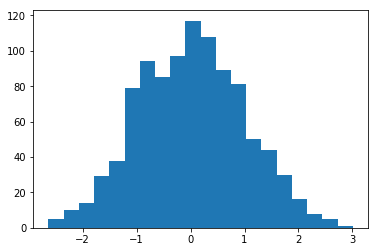

In [2]:
def skewKurtosis(x):
    return stats.skew(x), stats.kurtosis(x, fisher=False)
x = stats.norm.rvs(size=1000)
plt.hist(x, bins=20)
print(pd.Series(x).describe())
print(skewKurtosis(x))

In [3]:
data = pd.read_csv("/home/nicolas/Work/cours/19-civ8740-circulation/vitesses-st-louis-warwick.csv")
data2 = pd.read_csv('/home/nicolas/Research/Data/montreal/bt-temps-parcours/trips0203.csv')

count    210233.000000
mean        223.983261
std         317.798007
min          49.000000
25%          85.000000
50%         114.000000
75%         159.000000
max        1800.000000
Name: TravelTime_s, dtype: float64
(3.0045557322611445, 11.639359719758163)


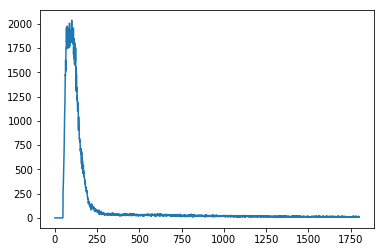

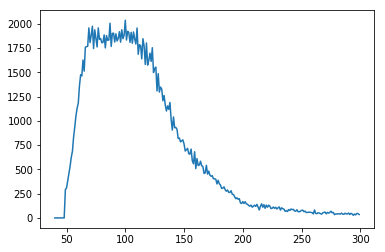

In [4]:
plt.plot(range(1801), np.bincount(data2.TravelTime_s))
plt.figure()
plt.plot(range(40,300), np.bincount(data2.TravelTime_s)[40:300])
print(data2.TravelTime_s.describe())
print(skewKurtosis(data2.TravelTime_s))

count    1323.000000
mean       32.614512
std         7.374948
min         0.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        64.000000
Name: Speed, dtype: float64
(-0.7349684912336603, 6.616631157085259)


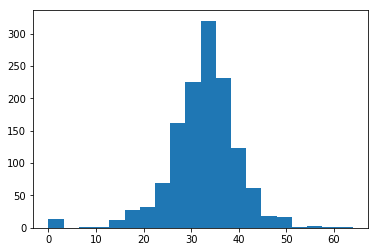

In [5]:
plt.hist(data.Speed, bins = 20)
print(data.Speed.describe())
print(skewKurtosis(data.Speed))

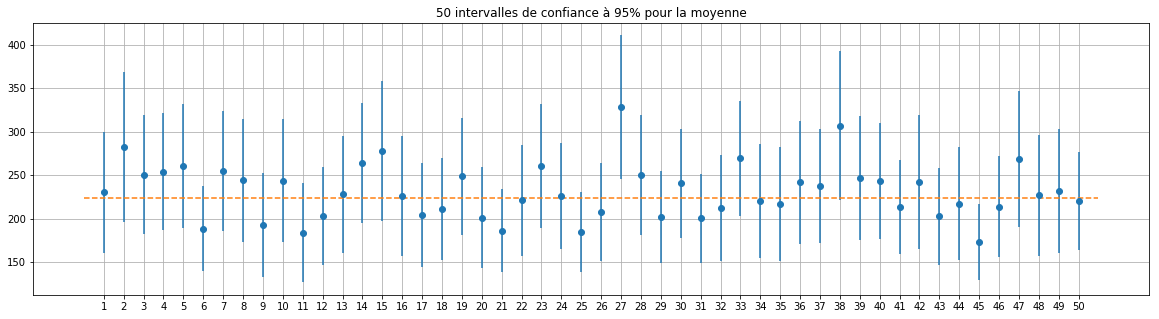

In [6]:
n = 100
perm = np.random.permutation(len(data2))
means = []
meanStd = []
for i in range(50):
    s = data2.TravelTime_s[perm[i*n:(i+1)*n]]
    means.append(s.mean())
    meanStd.append(1.96*s.std()/np.sqrt(n))
plt.figure(figsize=(20,5))
plt.errorbar(list(range(1,len(means)+1)),means, yerr=meanStd, fmt='o')
plt.plot([0, len(means)+1],[data2.TravelTime_s.mean()]*2, '--')
plt.title('{} intervalles de confiance à 95% pour la moyenne'.format(len(means)))
plt.xticks(list(range(1,len(means)+1)))
plt.grid()
plt.show()
